<a href="https://colab.research.google.com/github/RaviGprec/Neural-Network/blob/master/Creating%20Simple%20Neural%20Network%20without%20any%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Simple Neural NetWork Without Using Any External Package/Algorithms

Problem Statement:

Suppose we have some information about obesity, smoking habits, and exercise habits of five people. We also know whether these people are having cancer or not. Let's create a simple dataset of 5 rows one for each person.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#initializing features
X = np.array([[0,1,0],[0,0,1],[1,0,0],[1,1,0],[1,1,1]])
#Target variable
Y = np.array([[1,0,0,1,1]])
Y = Y.reshape(5,1)

df = pd.DataFrame(np.array([[0,1,0,1],[0,0,1,0],[1,0,0,0],[1,1,0,1],[1,1,1,1]]),columns=['smoke','obesity','excercise','cancer'])
df

,smoke,obesity,excercise,cancer
0,0,1,0,1
1,0,0,1,0
2,1,0,0,0
3,1,1,0,1
4,1,1,1,1


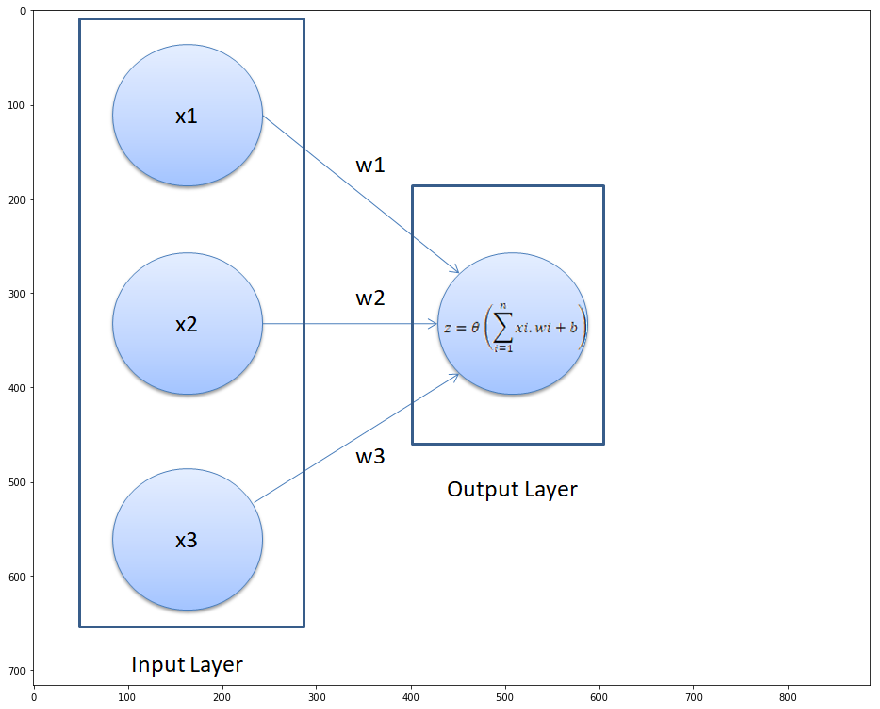

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("NN example.PNG")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,20))
plt.imshow(img_cvt)
plt.show()

## Creating Weights and Bias values randomly and Learning Rate with 0.05

In [0]:
#Weights and bias
np.random.seed(42) # this is for getting the same values for random function
weights = np.random.rand(3,1)
bias = np.random.rand(1)
lr = 0.05 # learning rate

## Defining Sigmoid Activation and it's derivative functions

In [0]:
#Sigmode activation function and its derivative
def sigmoid(z):
  return 1/(1+np.exp(-z))

def derivative_sigmoid(z):
  return sigmode(z)*(1-sigmode(z))

## Feed Forward Propagation and Backward Propagation 

In [0]:
for epoch in range(10000):
    inputs = X

    # feedforward step1
    XW = np.dot(X, weights) + bias

    #feedforward step2
    z = sigmoid(XW)


    # backpropagation step 1
    error = z - Y

    print(error.sum())

    # backpropagation step 2
    dcost_dpred = error
    dpred_dz = derivative_sigmoid(XW)

    z_delta = dcost_dpred * dpred_dz

    inputs = X.T
    weights -= lr * np.dot(inputs, z_delta) # w_new = w_old - learningRate(X_transpose.W)

    for num in z_delta:
        bias -= lr * num # bias_new = bias_old - learningRate(change in the activation function)

        
#by end of above loop we will get adjusted weights and bias values

Now we have trained our Neural Network and we have final Weights, Bias values

## Let's test our model
let's check if a person will have cancer or not when he only smokes and not obese and does not do execercise

In [23]:
test_input = np.array([1,0,0])
result = sigmoid(np.dot(test_input, weights) + bias)
print(result)

[0.04524916]


 we can see that the person is likely not diabetic since the value is much closer to 0 than 1.
**It means the person will not have Cancer**

In [40]:
#Let's try different test_input

#Smokes, obese, and doesn't do excercise
test_input = np.array([1,1,0])
result = sigmoid(np.dot(test_input, weights) + bias)
print(result)

[0.87257414]


we can see that the person is likely not diabetic since the value is much closer to 0 than 1. **It means the person will have Cancer**